In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from src.mlp import MLP, Layer
from src.visualisation import plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Squares Simple

In [27]:
df_training = pd.read_csv("data/mio1/regression/square-simple-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/square-simple-test.csv", index_col=0)

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [20]:
model = MLP(layers=[
    Layer(1, 4, activation="sigmoid"),
    Layer(4, 4, activation="sigmoid"),
    Layer(4, 1, activation="linear")
])

In [ ]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.01, epochs=5e4, verbose=1, batch_size=5)

**Loss history**

<Axes: >

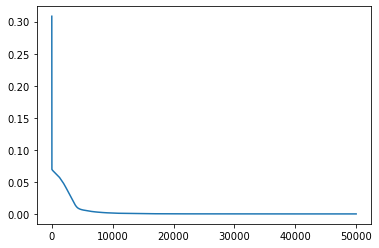

In [23]:
sns.lineplot(loss[0:])

**Model visualisation**

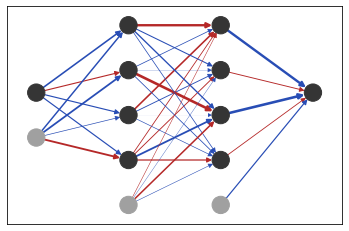

In [24]:
plot(model, log_weights=False)

**Training set MSE**

In [25]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

1.876397696472922


**Test set MSE**

In [28]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

2.442318565150992


**Data visualisation**

<Axes: >

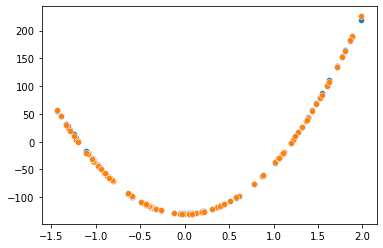

In [30]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))

### Steps Small

In [48]:
df_training = pd.read_csv("data/mio1/regression/steps-small-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/steps-small-test.csv", index_col=0)

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [69]:
model = MLP(layers=[
    Layer(1, 3, activation="sigmoid"),
    Layer(3, 1, activation="linear")
])

In [70]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.05, epochs=2e5, verbose=1, batch_size=25)

epoch: 0/200000.0
epoch: 1/200000.0
epoch: 2/200000.0
epoch: 3/200000.0
epoch: 4/200000.0
epoch: 5/200000.0
epoch: 6/200000.0
epoch: 7/200000.0
epoch: 8/200000.0
epoch: 9/200000.0
epoch: 10/200000.0
epoch: 11/200000.0
epoch: 12/200000.0
epoch: 13/200000.0
epoch: 14/200000.0
epoch: 15/200000.0
epoch: 16/200000.0
epoch: 17/200000.0
epoch: 18/200000.0
epoch: 19/200000.0
epoch: 20/200000.0
epoch: 21/200000.0
epoch: 22/200000.0
epoch: 23/200000.0
epoch: 24/200000.0
epoch: 25/200000.0
epoch: 26/200000.0
epoch: 27/200000.0
epoch: 28/200000.0
epoch: 29/200000.0
epoch: 30/200000.0
epoch: 31/200000.0
epoch: 32/200000.0
epoch: 33/200000.0
epoch: 34/200000.0
epoch: 35/200000.0
epoch: 36/200000.0
epoch: 37/200000.0
epoch: 38/200000.0
epoch: 39/200000.0
epoch: 40/200000.0
epoch: 41/200000.0
epoch: 42/200000.0
epoch: 43/200000.0
epoch: 44/200000.0
epoch: 45/200000.0
epoch: 46/200000.0
epoch: 47/200000.0
epoch: 48/200000.0
epoch: 49/200000.0
epoch: 50/200000.0
epoch: 51/200000.0
epoch: 52/200000.0
epo

**Loss history**

<Axes: >

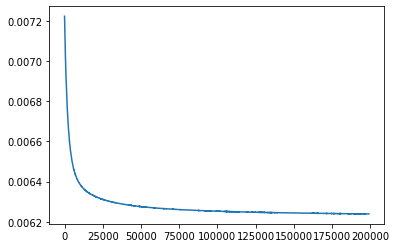

In [74]:
sns.lineplot(loss[1000:])

**Model visualisation**

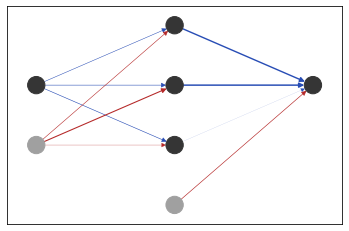

In [75]:
plot(model, log_weights=False)

**Training set MSE**

In [76]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

359.3768815924066


**Test set MSE**

In [77]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

417.8346410265505


**Data visualisation**

<Axes: >

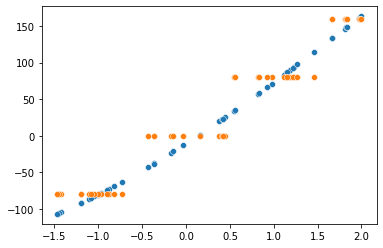

In [78]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))